# Pubg Dataset Analysis 

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import itertools
import warnings
warnings.filterwarnings("ignore")

In [3]:
train = pd.read_csv("train_V2.csv (1).zip")

In [5]:
test =  pd.read_csv("test_V2.csv.zip")

In [6]:
train.head()

,Id,groupId,matchId,assists,boosts,damageDealt,DBNOs,headshotKills,heals,killPlace,...,revives,rideDistance,roadKills,swimDistance,teamKills,vehicleDestroys,walkDistance,weaponsAcquired,winPoints,winPlacePerc
0,7f96b2f878858a,4d4b580de459be,a10357fd1a4a91,0,0,0.00,0,0,0,60,...,0,0.0000,0,0.00,0,0,244.80,1,1466,0.4444
1,eef90569b9d03c,684d5656442f9e,aeb375fc57110c,0,0,91.47,0,0,0,57,...,0,0.0045,0,11.04,0,0,1434.00,5,0,0.6400
2,1eaf90ac73de72,6a4a42c3245a74,110163d8bb94ae,1,0,68.00,0,0,0,47,...,0,0.0000,0,0.00,0,0,161.80,2,0,0.7755
3,4616d365dd2853,a930a9c79cd721,f1f1f4ef412d7e,0,0,32.90,0,0,0,75,...,0,0.0000,0,0.00,0,0,202.70,3,0,0.1667
4,315c96c26c9aac,de04010b3458dd,6dc8ff871e21e6,0,0,100.00,0,0,0,45,...,0,0.0000,0,0.00,0,0,49.75,2,0,0.1875


In [7]:
print(train.info)

<bound method DataFrame.info of                      Id         groupId         matchId  assists  boosts  \
0        7f96b2f878858a  4d4b580de459be  a10357fd1a4a91        0       0   
1        eef90569b9d03c  684d5656442f9e  aeb375fc57110c        0       0   
2        1eaf90ac73de72  6a4a42c3245a74  110163d8bb94ae        1       0   
3        4616d365dd2853  a930a9c79cd721  f1f1f4ef412d7e        0       0   
4        315c96c26c9aac  de04010b3458dd  6dc8ff871e21e6        0       0   
...                 ...             ...             ...      ...     ...   
4446961  afff7f652dbc10  d238e426f50de7  18492834ce5635        0       0   
4446962  f4197cf374e6c0  408cdb5c46b2ac  ee854b837376d9        0       1   
4446963  e1948b1295c88a  e26ac84bdf7cef  6d0cd12784f1ab        0       0   
4446964  cc032cdd73b7ac  c2223f35411394  c9c701d0ad758a        0       4   
4446965  0d8e7ed728b6fd  8c74f72fedf5ff  62a16aabcc095c        0       2   

         damageDealt  DBNOs  headshotKills  heals  kill

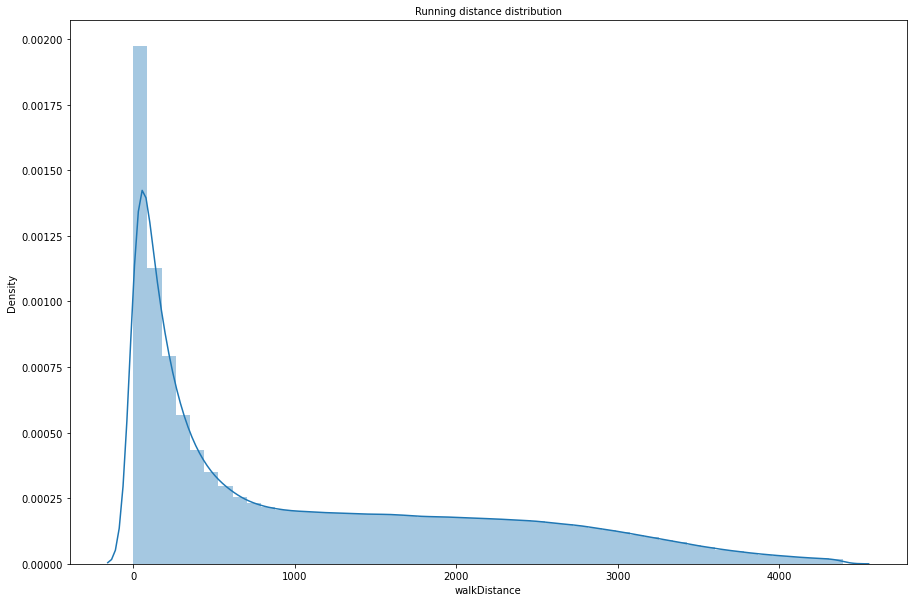

In [9]:

#Analysing Running in the game
data = train.copy()
data = data[data["walkDistance"] < train["walkDistance"].quantile(0.99)]
plt.figure(figsize = (15,10))
plt.title("Running distance distribution",fontsize = 10)
sns.distplot(data["walkDistance"])
plt.show()

In [14]:
#FIND OUT UNIQUE COUNT OF MATCH ID & GROUP ID
for i in ['Id','groupId','matchId']:
    print(f'unique [{i}] count:', train[i].nunique())

unique [Id] count: 4446966
unique [groupId] count: 2026745
unique [matchId] count: 47965


<AxesSubplot:>

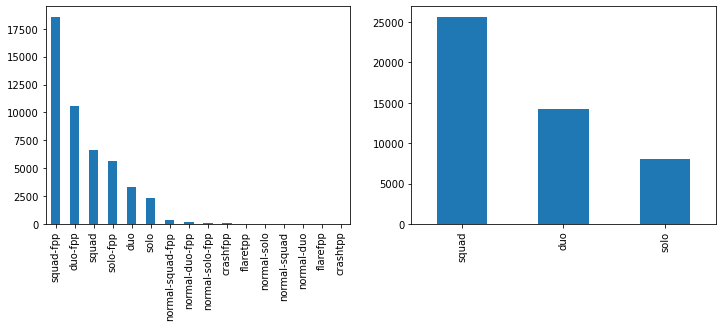

In [15]:
fig, ax = plt.subplots(1, 2, figsize=(12, 4))

train.groupby('matchId')['matchType'].first().value_counts().plot.bar(ax=ax[0])

mapper = lambda x: 'solo' if ('solo' in x) else 'duo' if ('duo' in x) or ('crash' in x) else 'squad'
train['matchType'] = train['matchType'].apply(mapper)
train.groupby('matchId')['matchType'].first().value_counts().plot.bar(ax=ax[1])

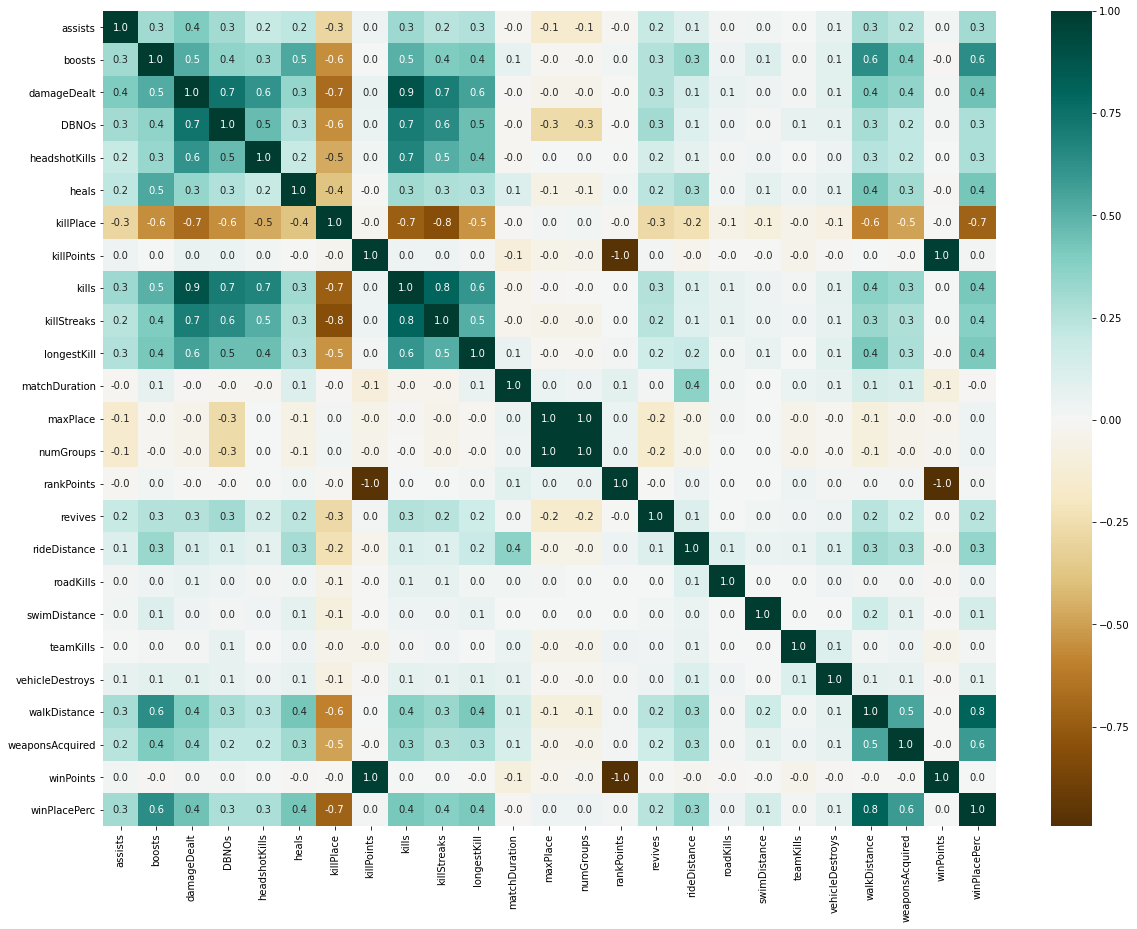

In [17]:
#PLOT HEATMAP TO FIND OUT CORRELATION OF FEATURES WITH WINNING PERCENTAGE
f,ax = plt.subplots(figsize=(20, 15))
sns.heatmap(train.corr(), annot=True, fmt= '.1f',cmap="BrBG")
plt.show()

#  Feature Engineering

In [18]:
#AVERAGE KILL BY A PLAYER
print("On an average a person kills {:.4f} players, 99% of people have {} kills or less, while the maximum kills ever recorded is {}.".format(train['kills'].mean(),train['kills'].quantile(0.99), train['kills'].max()))

On an average a person kills 0.9248 players, 99% of people have 7.0 kills or less, while the maximum kills ever recorded is 72.


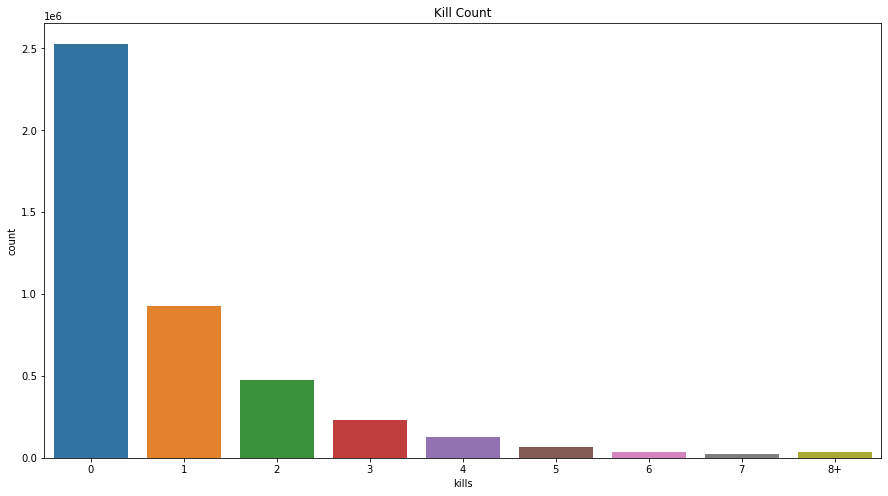

In [19]:
df = train.copy()
df.loc[df['kills'] > df['kills'].quantile(0.99)] = '8+'
plt.figure(figsize=(15,8))
sns.countplot(df['kills'].astype('str').sort_values())
plt.title("Kill Count")
plt.show()

# Effect of Killing on Winning Percentage

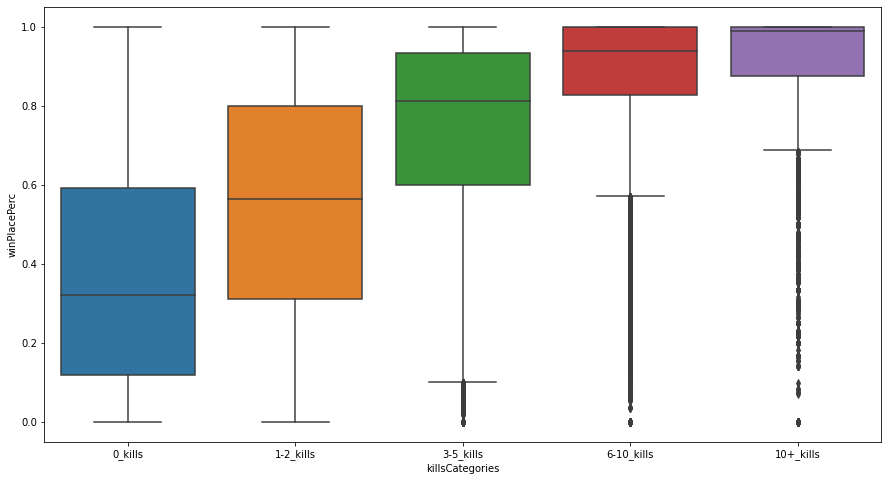

In [20]:
kills = train.copy()
kills['killsCategories'] = pd.cut(kills['kills'], [-1, 0, 2, 5, 10, 60], labels=['0_kills','1-2_kills', '3-5_kills', '6-10_kills', '10+_kills'])
plt.figure(figsize=(15,8))
sns.boxplot(x="killsCategories", y="winPlacePerc", data=kills)
plt.show()

In [24]:
#players with zero boost and more than 20 kills
train["noboost_morekills"] = ((train["kills"] > 20) & (train["boosts"] ==0))
print(train[train["noboost_morekills"]].shape)
train[train["noboost_morekills"]]
#348 players with more than 20 kills and not even consumed energy drink even once

(348, 30)


,Id,groupId,matchId,assists,boosts,damageDealt,DBNOs,headshotKills,heals,killPlace,...,rideDistance,roadKills,swimDistance,teamKills,vehicleDestroys,walkDistance,weaponsAcquired,winPoints,winPlacePerc,noboost_morekills
19531,ef706f0f248dbf,f27e63bfc6746c,7d2fd7f5d4f8b2,9,0,2856.0,32,3,0,1,...,0.0,0,0.0,0,0,1136.00,20,0,0.8000,True
40047,8d8d78ba4e9b55,6634da8e3940de,8a728def0644be,3,0,1988.0,22,6,5,5,...,1668.0,0,0.0,0,0,1864.00,33,1500,1.0000,True
53442,f7a740ffbc2c43,418f6120b2e193,f2614050e9046a,2,0,1906.0,0,4,19,2,...,0.0,0,0.0,0,0,116.70,16,0,1.0000,True
57490,367599b150318a,0370e2f3be345b,5f2f9fcb9705af,6,0,2459.0,0,3,0,2,...,0.0,0,0.0,0,0,208.50,12,0,0.8333,True
57978,9d8253e21ccbbd,ef7135ed856cd8,37f05e2a01015f,9,0,3725.0,0,7,0,2,...,0.0,0,0.0,0,0,48.82,48,1500,0.8571,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4381091,97bf68b6df93c2,afc31d91549183,17c643ab998ecb,7,0,2360.0,0,2,11,5,...,0.0,0,0.0,1,0,295.30,73,1500,0.3333,True
4399662,8800992f7dd530,87e52e1a6b0a73,1e573980b3ee3c,1,0,1999.0,0,1,8,5,...,0.0,0,0.0,0,0,111.80,59,1500,0.3333,True
4402706,f69c34cce4d46a,ea800ea1aa6efa,ed092b499ac27d,3,0,2817.0,0,6,2,3,...,0.0,0,0.0,0,0,1147.00,31,1500,0.4000,True
4420563,0a2721fcf1cdd9,1708576031cf96,fcd20a43cb81ea,6,0,3297.0,0,5,4,1,...,0.0,0,0.0,0,0,253.00,32,0,1.0000,True


In [25]:
#players with more than 30 kills
train["morekills"] = (train["kills"]>30)
print(train[train["morekills"]].shape)
train[train["morekills"]]
#to remove 102 players with more than 30 kills

(102, 31)


,Id,groupId,matchId,assists,boosts,damageDealt,DBNOs,headshotKills,heals,killPlace,...,roadKills,swimDistance,teamKills,vehicleDestroys,walkDistance,weaponsAcquired,winPoints,winPlacePerc,noboost_morekills,morekills
57978,9d8253e21ccbbd,ef7135ed856cd8,37f05e2a01015f,9,0,3725.0,0,7,0,2,...,0,0.0,0,0,48.82,48,1500,0.8571,True,True
87793,45f76442384931,b3627758941d34,37f05e2a01015f,8,0,3087.0,0,8,27,3,...,0,0.0,0,0,780.70,45,1500,1.0000,True,True
156599,746aa7eabf7c86,5723e7d8250da3,f900de1ec39fa5,21,0,5479.0,0,12,7,4,...,0,0.0,0,0,23.71,61,0,0.7000,True,True
160254,15622257cb44e2,1a513eeecfe724,db413c7c48292c,1,0,4033.0,0,40,0,1,...,0,0.0,1,0,718.30,16,1500,1.0000,True,True
180189,1355613d43e2d0,f863cd38c61dbf,39c442628f5df5,5,0,3171.0,0,6,15,1,...,0,0.0,0,0,71.51,41,0,1.0000,True,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4021018,1f1c3dda0296df,7c95f475fd2cdb,a9e84c456cc859,6,0,3406.0,0,8,10,2,...,0,0.0,0,0,2264.00,40,0,0.9167,True,True
4127904,f699c842c5dfab,9d69e4e697d296,1ac375e4121651,5,0,3420.0,39,20,1,1,...,0,0.0,0,0,319.20,29,1500,0.7500,True,True
4148675,5283367a7f8d06,35b9b765110fd2,f900de1ec39fa5,12,0,3050.0,0,5,4,7,...,0,0.0,0,0,123.80,89,0,0.4000,True,True
4235682,6874be9215646b,af1d17223258d0,0f09bd72c4ba97,1,0,3006.0,0,9,18,2,...,0,0.0,0,0,557.50,20,1500,0.4286,True,True
